/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/1581135557.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/1581135557.py:76: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/1581135557.py:103: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


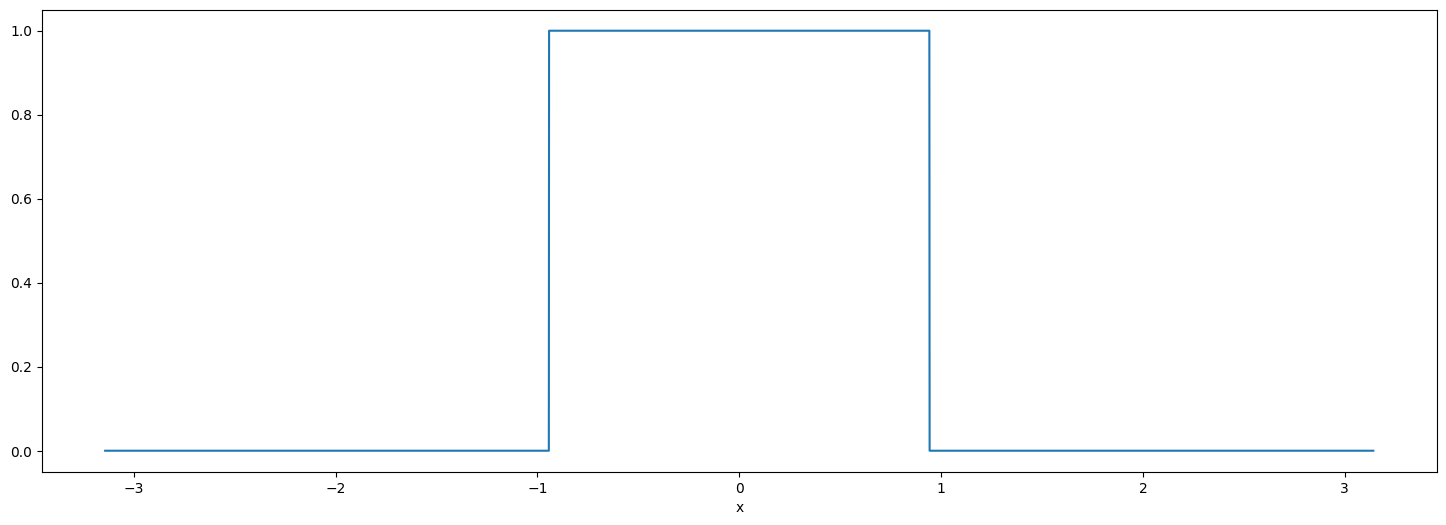

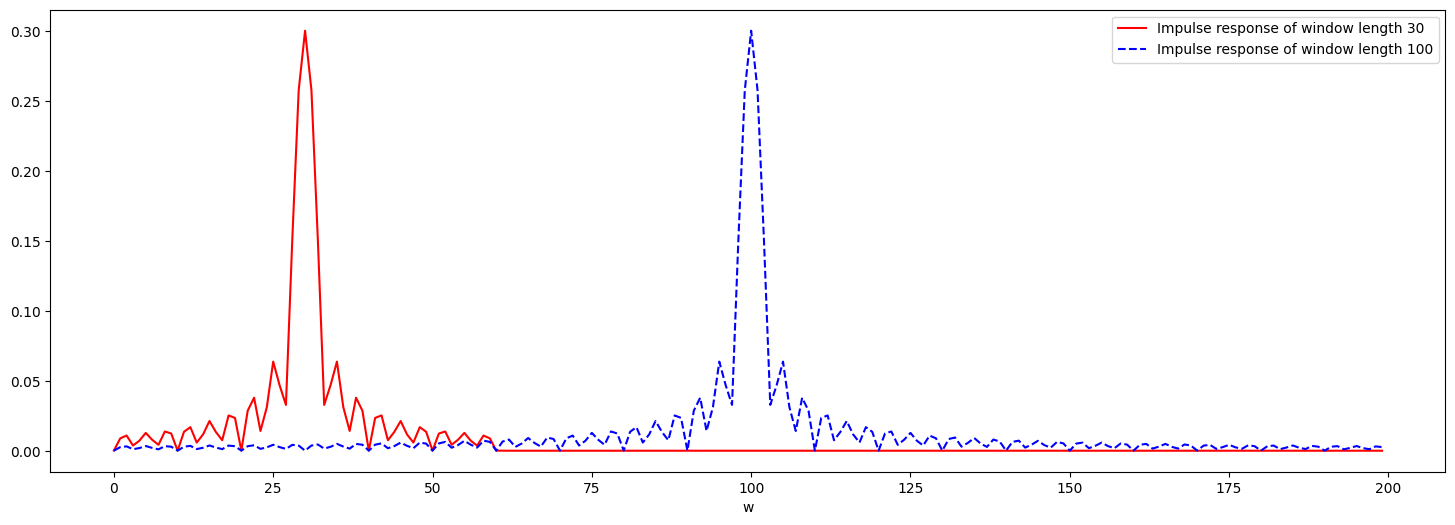

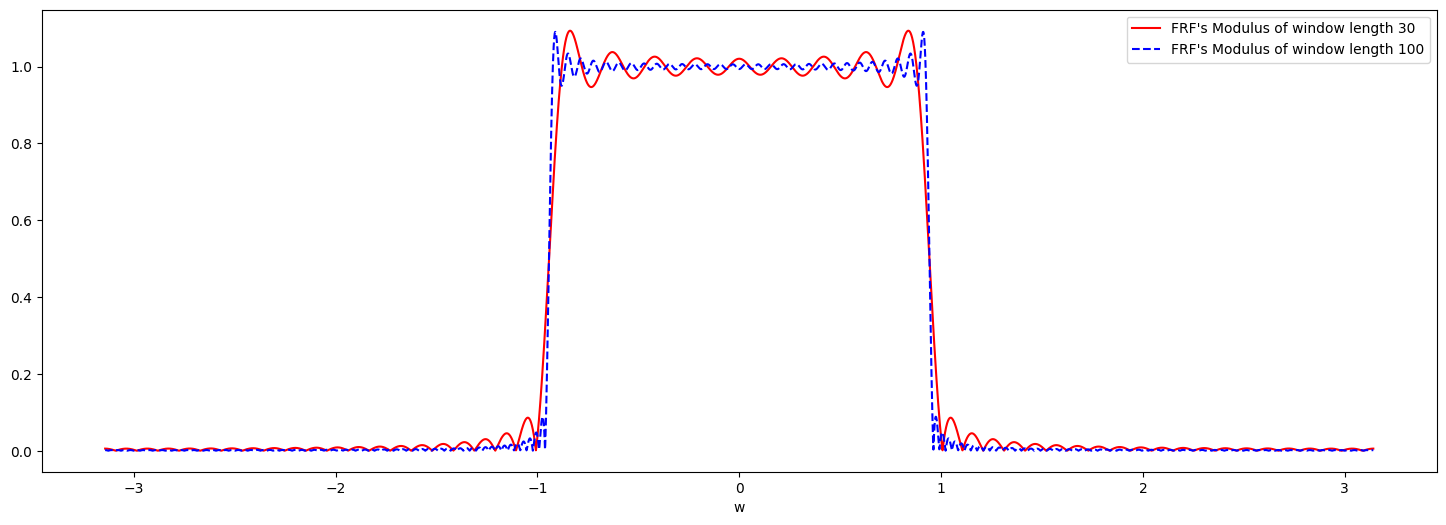

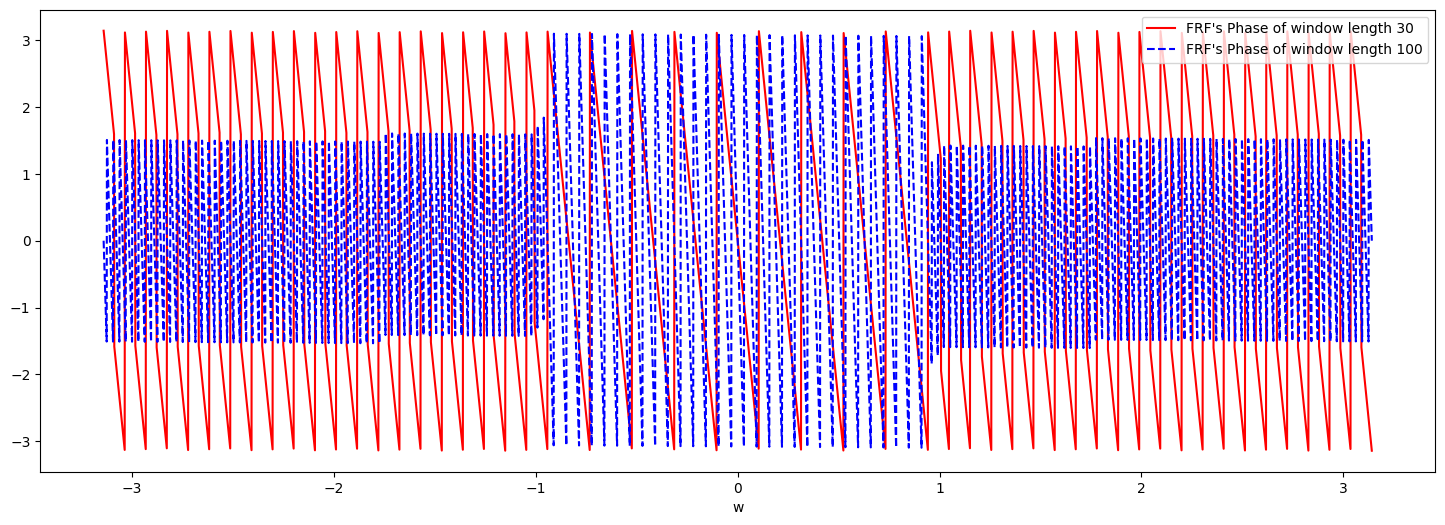

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def expand(arr, n):
    return np.pad(arr, (0, n - len(arr)), 'constant')

def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag

def gen_g(d, h):
    def g(t):
        return np.where((t >= -d) & (t <= d), h, 0)
    return g

W_C = 0.3 * np.pi
low_pass_g = gen_g(W_C, 1)

SAMPLE_N = 5000
def discret_samples(f, d):
    t_values = np.linspace(-d, d, SAMPLE_N)
    return t_values, f(t_values)

def __draw(xs, ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(xs, ys)
    plt.xlabel('x')
    fig.show()
    
def __draw_ys(ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ys)
    plt.xlabel('x')
    fig.show()
    
__draw(*discret_samples(low_pass_g, np.pi))

def idtft_window(minn, maxn, dtft_func):
    ns = np.arange(minn, maxn + 1)
    hs = np.zeros_like(ns, dtype=complex)
    w_samples, f_samples = discret_samples(dtft_func, np.pi)
    dw = w_samples[1] - w_samples[0]
    for i in range(len(ns)):
        hs[i] = 1 / (2 * np.pi) * np.sum(f_samples * np.exp(1j * ns[i] * w_samples) * dw)
    return ns, hs # hs itself is causal

ns, hs = idtft_window(-30, 30, low_pass_g)

def filter(bz, x, L):
    ...
    # y[n] = 
    xs = expand(x, L) # first several x
    ys = np.zeros_like(xs)
    def y_at(n):
        return 0 if n < 0 else ys[n]
    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        # calculate y[n]
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))])
    return xs, ys

fig = plt.figure(figsize=(18, 6))
test_n = [30, 100]
colors = ['r-', 'b--']
for j in range(len(test_n)):
    n = test_n[j]
    ns, hs = idtft_window(-n, n, low_pass_g)
    bz = hs
    impulse_xs = np.array([1 + 0j])
    L = 200
    xs, ys = filter(bz, impulse_xs, L)
    hs_plots = get_mod_pha_real_imag(ys)
    plt.plot(np.arange(L), hs_plots[0], colors[j],label=f'Impulse response of window length {n}'),
plt.xlabel('w')
plt.legend()
fig.show()

def h_value(bz, z: complex):
    num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
    den = 1
    return num / den

def frequency_response(bz):
    ws = np.linspace(-np.pi, np.pi, SAMPLE_N)
    hs = np.array([h_value(bz, np.exp(1j * omega)) for omega in ws])
    return ws, hs
    

names = ['Modulus', 'Phase']
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    test_n = [30, 100]
    colors = ['r-', 'b--']
    for j in range(len(test_n)):
        n = test_n[j]
        ns, hs = idtft_window(-n, n, low_pass_g)
        bz = hs
        ws, hs = frequency_response(bz)
        hs_plots = get_mod_pha_real_imag(hs)
        plt.plot(ws, hs_plots[i], colors[j],label=f'FRF\'s {names[i]} of window length {n}'),
    plt.xlabel('w')
    plt.legend()
    fig.show()


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/1581135557.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/1581135557.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_8334/490288016.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[ 7.00140028e-01+0.00000000e+00j -2.57753434e-01+0.00000000e+00j
 -1.51146790e-01+1.76697482e-17j -3.29307008e-02+2.65046223e-17j
  4.70230909e-02-2.65046223e-17j  6.34620137e-02-1.32523112e-17j
  3.13345192e-02-1.76697482e-17j -1.43090287e-02-8.83487412e-18j
 -3.76599576e-02+0.00000000e+00j -2.87780001e-02+1.98784668e-17j
  2.60052370e-04+0.00000000e+00j  2.32461076e-02+1.32523112e-17j
  2.54092273e-02-2.65046223e-17j  7.30934331e-03-4.41743706e-18j
 -1.32127698e-02-4.41743706e-18j -2.14209285e-02+1.98784668e-17j
 -1.14451684e-02-2.20871853e-18j  5.64318463e-03+4.63830891e-17j
  1.70372187e-02-1.32523112e-17j  1.33185048e-02-3.75482150e-17j
  1.40026568e-04-4.63830891e-17j -1.24983420e-02+5.30092447e-17j
 -1.35422207e-02-2.54002631e-17j -4.41973142e-03+8.50356634e-17j
  8.04455222e-03-2.65046223e-17j  1.25327378e-02-2.98177001e-17j
  7.34779248e-03-5.52179632e-17j -3.90032508e-03+2.65046223e-17j
 -1.06307233e-02-4.85918076e-17j -9.04505766e-03+1.49640680e-16j
  2.60055246e-04+0.000000

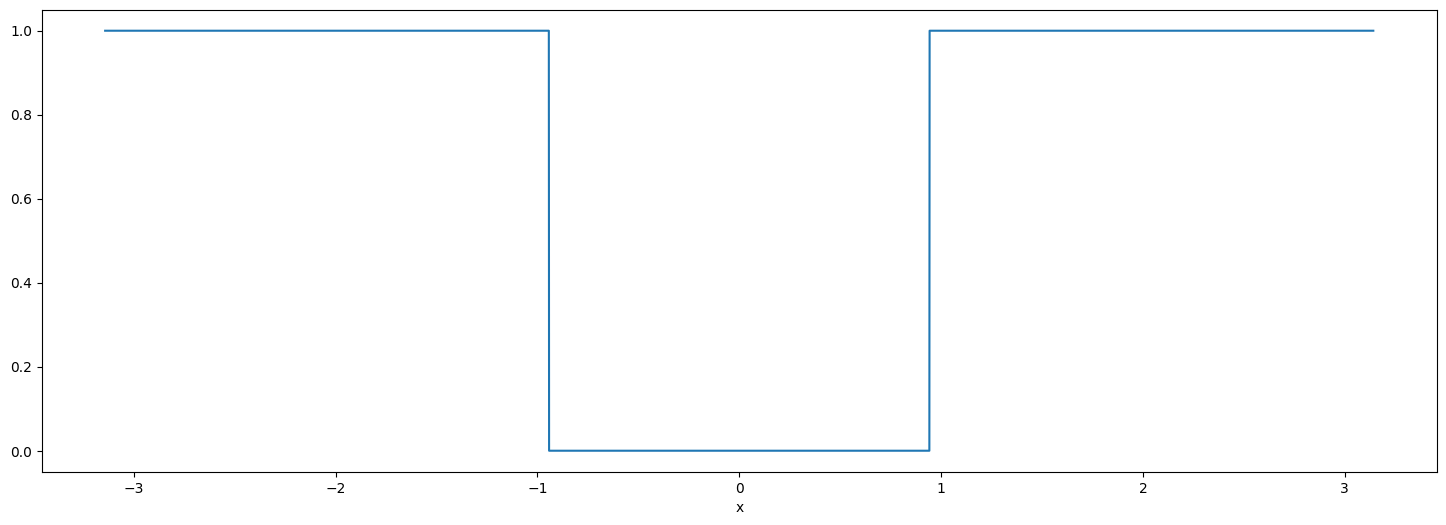

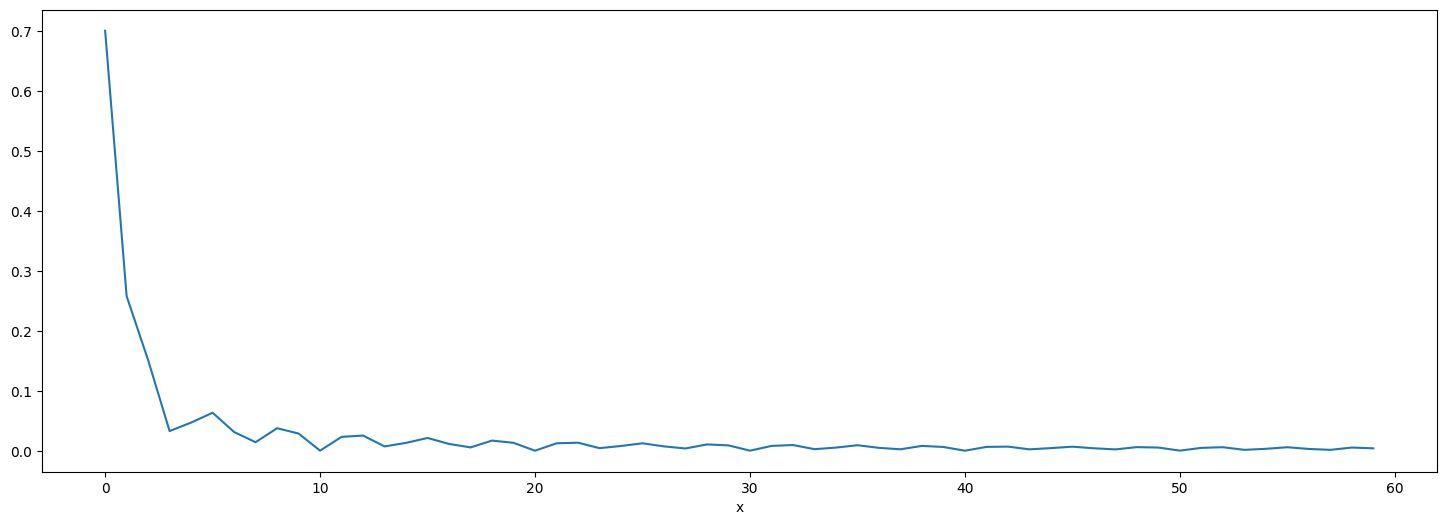

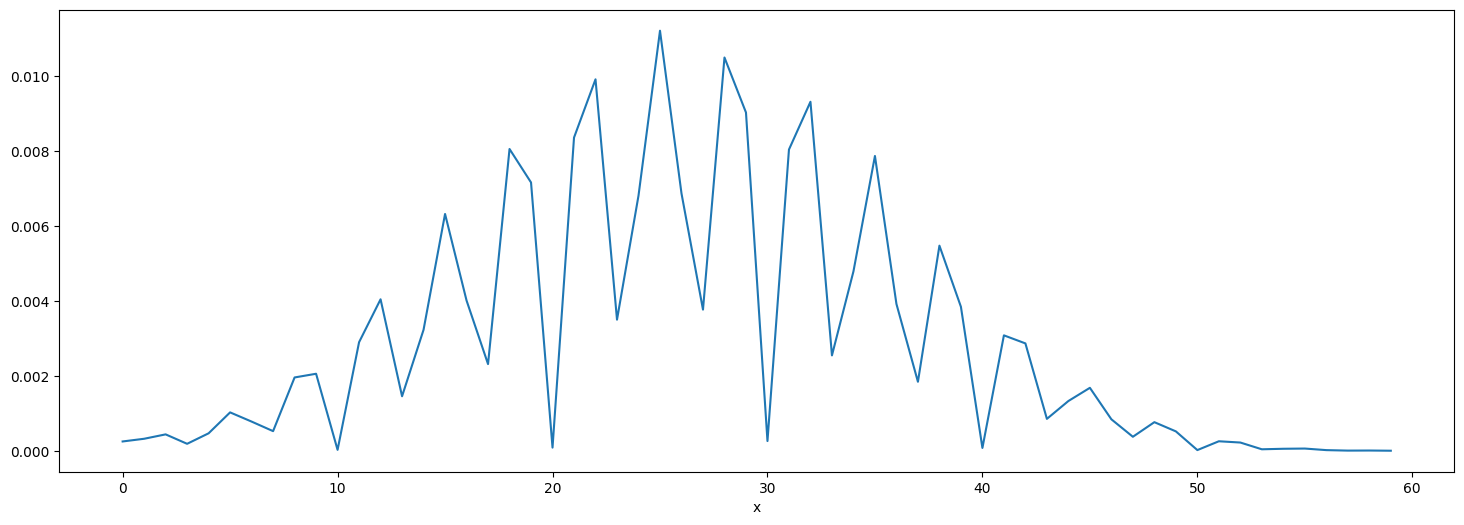

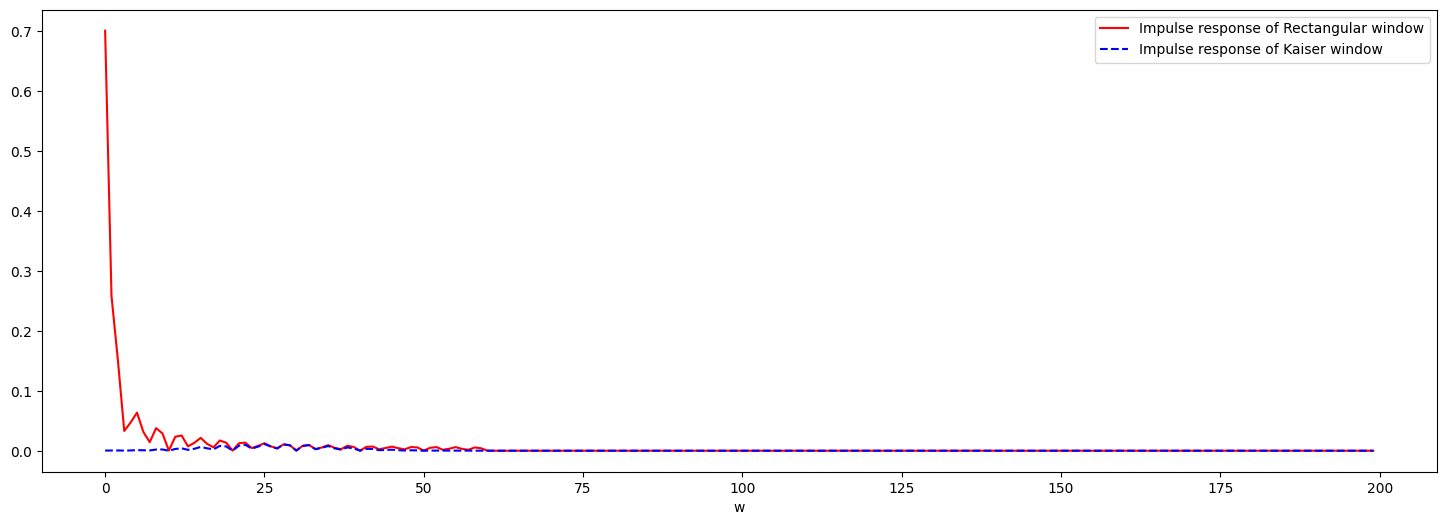

In [22]:
def gen_pit(d, h):
    def g(t):
        return np.where((t <= -d) | (t >= d), h, 0)
    return g

high_pass_g = gen_pit(W_C, 1)
__draw(*discret_samples(high_pass_g, np.pi))

WINDOW_N = 60
ns, hs = idtft_window(0, WINDOW_N - 1, high_pass_g)
# print(hs)
kaiser_hs = np.kaiser(WINDOW_N, beta=10) * hs
window_names = ['Rectangular', 'Kaiser']

__draw_ys(np.abs(hs))
__draw_ys(np.abs(kaiser_hs))

fig = plt.figure(figsize=(18, 6))
colors = ['r-', 'b--']
for i in range(2):
    bz = hs if i == 0 else kaiser_hs
    impulse_xs = np.array([1 + 0j])
    L = 200
    xs, ys = filter(bz, impulse_xs, L)
    hs_plots = get_mod_pha_real_imag(ys)
    plt.plot(np.arange(L), hs_plots[0], colors[i], label=f'Impulse response of {window_names[i]} window'),
plt.xlabel('w')
plt.legend()
fig.show()
